In [1]:
%pylab inline
import glob

from sklearn.decomposition import PCA, FastICA
from skimage.color import rgb2gray
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)


Populating the interactive namespace from numpy and matplotlib


In [18]:
tumor_patches_dir = '../../../histopath_data/CAMELYON16/training/extracted_tumor_patches/level_5/'
normal_patches_dir = '../../../histopath_data/CAMELYON16/training/extracted_normal_patches/level_5/'
np.random.seed(42)
master_matrix = []
label_matrix = []
y = []
for f in glob.glob('{}*.png'.format(tumor_patches_dir)):
    master_matrix.append(rgb2gray(plt.imread(f)))
    label_matrix.append('tumor')
    y.append(1)

tumor_count = len(label_matrix)
count = 0
list_of_normal_files = list(glob.glob('{}*.png'.format(normal_patches_dir)))
np.random.shuffle(list_of_normal_files)

for f in list_of_normal_files:    
    master_matrix.append(rgb2gray(plt.imread(f)))
    label_matrix.append('normal')
    count += 1    
    y.append(0)
    if count == tumor_count:
        break
    
master_matrix = np.array(master_matrix)
y=np.array(y)

In [32]:
list_of_normal_files = list(glob.glob('{}*.png'.format(normal_patches_dir)))
len(list_of_normal_files)

2415

In [25]:
len(y)

11432

In [26]:
shape = master_matrix.shape
master_matrix_reshaped = master_matrix.reshape(shape[0], shape[1]*shape[2])

In [27]:
master_matrix_reshaped.shape

(11432, 65536)

In [28]:
np.sum(np.where(y==0))

24690960

In [29]:
np.sum(np.where(y==1))/np.sum(np.where(y==0))

1.6462962962962964

explained variance ratio (first two components): [0.38032431 0.10133548]


Text(0.5,1,'PCA ')

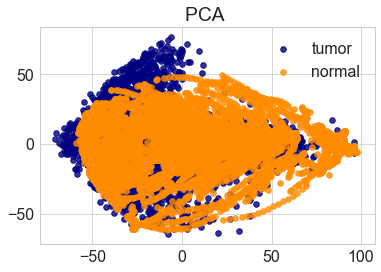

In [5]:
pca = PCA(n_components=2)
X_r = pca.fit(master_matrix_reshaped).transform(master_matrix_reshaped)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange']
lw = 1
label_matrix = ['tumor', 'normal']
for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ')

# LDA

/home/saket/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5,1,'LDA ')

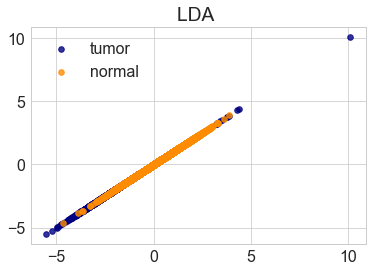

In [6]:

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(master_matrix_reshaped, y).transform(master_matrix_reshaped)
colors = ['navy', 'darkorange']

for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA ')

Text(0.5,1,'ICA ')

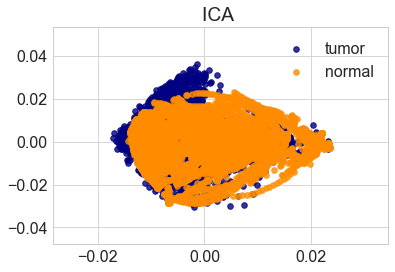

In [7]:
ica = FastICA(n_components=2)
X_r = ica.fit(master_matrix_reshaped).transform(master_matrix_reshaped)



plt.figure()
colors = ['navy', 'darkorange']
lw = 1
label_matrix = ['tumor', 'normal']
for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA ')

In [9]:

embedding = umap.UMAP(n_neighbors=20,
                      min_dist=0.3,
                      metric='correlation').fit_transform(master_matrix_reshaped)

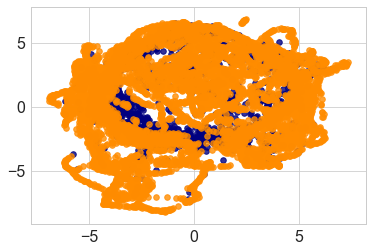

In [10]:
plt.figure()
colors = ['navy', 'darkorange']
lw = 1
label_matrix = ['tumor', 'normal']

for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(embedding[y == i, 0], embedding[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
